# Vamos simular uma estratégia que compra dólar se o retorno do dia anterior foi negativo: 

# Importando os módulos necessários:

In [5]:
import pandas as pd 
from pandas_datareader import data as wb 
import numpy as np 
from scipy import stats 
import statsmodels.api as sm 
import matplotlib.pyplot as plt

# Pegando e estruturando os dados: 

In [6]:
#definimos o ticker do USD-BRL:
tickers = ['USDBRL=X']
base_moeda=pd.DataFrame()

#Vamos pegar os preços no yahoo finance e passar tudo para um data frame:
for i in tickers: 
    base_moeda[i]=wb.DataReader(i,data_source='yahoo',start='2010-01-01')['Adj Close']

#Adicionando no data frame os retornos e os retornos do dia anterior: 
base_moeda['Retorno']=base_moeda/base_moeda.shift(1)-1
base_moeda['Retorno Dia Anterior']=base_moeda['Retorno'].shift(1)
base_moeda = base_moeda.iloc[2:]

# Fazendo a Regressão:

                            OLS Regression Results                            
Dep. Variable:                Retorno   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     95.29
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           3.75e-22
Time:                        18:37:33   Log-Likelihood:                 8503.4
No. Observations:                2750   AIC:                        -1.700e+04
Df Residuals:                    2748   BIC:                        -1.699e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0005 

C:\Users\pedro\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


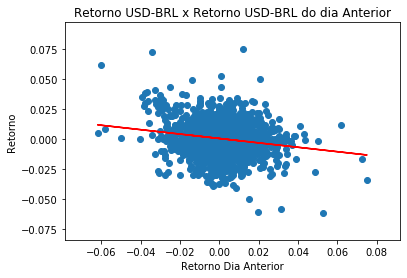

In [7]:
#Fazemos uma regressão querendo explicar o retorno do USD-BRL pelo retorno do dia anterior: 
X = base_moeda['Retorno Dia Anterior']
Y = base_moeda['Retorno']
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()
print(reg.summary())     #p-valor muito pequeno!

#Plotamos tudo: 
plt.scatter(base_moeda['Retorno Dia Anterior'],base_moeda['Retorno'])
plt.plot(X,stats.linregress(X,Y).slope*X+stats.linregress(X,Y).intercept,color='Red')
plt.xlabel('Retorno Dia Anterior')
plt.ylabel('Retorno')
plt.title('Retorno USD-BRL x Retorno USD-BRL do dia Anterior')
plt.show()

# Montando e rodando a estratégia: 

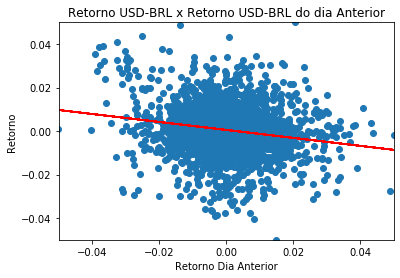

In [8]:
#Plotamos tudo com um pouco mais de zoom: 
plt.scatter(base_moeda['Retorno Dia Anterior'],base_moeda['Retorno'])
plt.plot(X,stats.linregress(X,Y).slope*X+stats.linregress(X,Y).intercept,color='Red')
plt.xlabel('Retorno Dia Anterior')
plt.ylabel('Retorno')
plt.title('Retorno USD-BRL x Retorno USD-BRL do dia Anterior')
plt.axis([-0.05,0.05,-0.05,0.05])
plt.show()

#Agora vamos testar uma estratégia que vai comprar se o retorno do dia anterior foi negativo e vender caso contrário: 
def f1(row):
    if row['Retorno Dia Anterior'] < 0:
        valor = row['Retorno']
    elif row['Retorno Dia Anterior'] > 0:
        valor = -row['Retorno']
    else:
        valor = 0
    return valor

def normalizar(base,valor):
    norm = []
    norm.append(100)
    for i in range(len(base))[1:]: 
        norm.append((1+base[i])*norm[i-1])
    
    return norm

base_moeda=pd.DataFrame()
#Vamos pegar os preços no yahoo finance e passar tudo para um data frame:
for i in tickers: 
    base_moeda[i]=wb.DataReader(i,data_source='yahoo',start='2009-12-31')['Adj Close']
    
#Adicionando no data frame os retornos e os retornos do dia anterior: 
base_moeda['Retorno']=base_moeda/base_moeda.shift(1)-1
base_moeda['Retorno Dia Anterior']=base_moeda['Retorno'].shift(1)
    
#Inserindo a Estratégia: 
base_moeda['Retornos Estratégia']=base_moeda.apply(f1,axis=1)
base_moeda['Base 100 Estratégia']=normalizar(base_moeda['Retornos Estratégia'],100)

# Plotando os Resultados: 

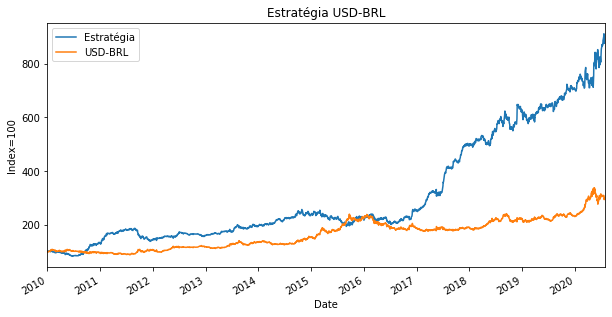

In [9]:
#Plotando a Estratégia: 
base_moeda['Base 100 Estratégia'].plot(figsize=(10,5),label='Estratégia')
plt.title('Estratégia USD-BRL')
plt.plot((base_moeda['USDBRL=X']/base_moeda['USDBRL=X'].iloc[0])*100,label='USD-BRL')
plt.ylabel('Index=100')
plt.legend()
plt.show()